In [149]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Convolutional Neural Network

고양이 뇌 연구에서 연감을 받은걸로 알려짐

In [150]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)

(1, 3, 3, 1)


matplotlib을 이용하면 image를 그림으로 나타낼 수 있다.

(참고: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html )

아래 처럼 나타낸 그림을 Toy image라고 한다.

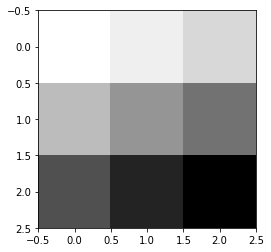

In [151]:
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

자 이제 필터(weight)를 그림 위에 올려놓고 마주보는 그림끼리 곱하는 과정을 할것이다.

우선을 필터를 만들자

In [152]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


이제 필터를 움직이면서 곱해줘야하는데 다행히도 텐서플로우 함수에서 지원해준다.

한칸씩 옮긴다고 가정하고(stride=1), padding은 아직 쓰지 말자 (Padding:VALID)

In [153]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)


필터로 나온값을 시각화 시켜보자

conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


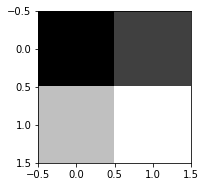

In [154]:
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
    plt.show()    

만약 padding을 적용시키면 어떻게 될까??

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID') 에서 padding='SAME' 해주면 
필터사이즈에 상관없이 stride가 1x1이면 입력한 이미지와 같은 크기로 출력된다.

그러면 텐서플로우가 자동으로 입력이미지의 테두리에 0을 채워서 계산하게 된다.

필터는 위에서 사용한 것을 그대로 쓰자

conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


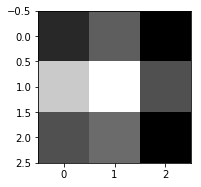

In [155]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

## 여러개 필터

필터의 갯수를 여러개로 하고 싶다면 늘리면 된다!
예를들어 3개로 늘린다고 하면 weight.shape가 (2, 2, 1, 1)에서 (2, 2, 1, 3)로 늘리면 된다.

필터를 아래처럼 만들자

In [156]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 3)


이제 다시 옮기면서 필터값을 곱할것인데 padding을 적용하고 stride는 그대로 1x1로 하자

In [157]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

conv2d_img.shape: (1, 3, 3, 3)


필터에서 나온값의 모양은 (1, 3, 3, 1) 였지만 (1, 3, 3, 3)이 됐다. 

그러면 필터를 걸쳐 나온 값들을 확인하고 사진으로 나타내자

시각화 시키면 3장의 사진이 나올 것이다.

[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


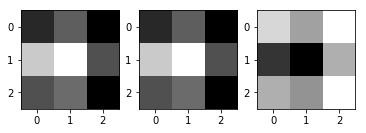

In [158]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
plt.show()

## Pooling

pooling이 뭔지는 추가해야함

In [159]:
image = np.array([[[[4],[3]],
                 [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')

print(pool.shape,'\n')
print(pool.eval())

(1, 2, 2, 1) 

[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


## 실전예제 : MNIST

MNIST에 적용시켜 보자

일단 MNISTf를 불러오자

In [171]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


불러왔는지 확인하기 위해 그림을 하나 불러와보자

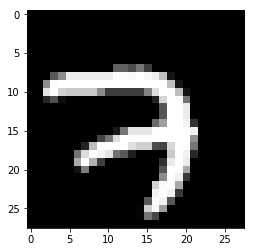

In [172]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

Convolution layer를 통과시켜보자

사진은 28 X 28 크기고 한 색깔로 이루어져 있으므로 아래처럼 reshpae해준다.

In [173]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)

그리고 필터를 만들어 주는데 크기는 3 * 3, 색은 1개안 5개의 필터는 (3,3,1,5)로 나타낼 수 있다.

In [174]:
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))

이제 옮기면서 필터값을 곱할것인데 padding을 적용하고 stride는 그대로 2 * 2로 하자

In [175]:
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1],padding='SAME')
print(conv2d)

Tensor("Conv2D_41:0", shape=(1, 14, 14, 5), dtype=float32)


padding을 줬지만 strides가 2 * 2라서  (28,28)의 반인 (14,14)의 그림이 됐다.

그림을 실제로 출력해보자

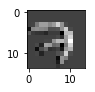

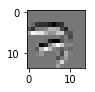

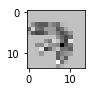

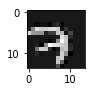

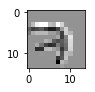

In [176]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    plt.show()

5개의 필터를 사용해서 5개가 나왔다. weight가 랜덤이여서 각 각 다르다. 

이제 pooling을 MNIST에 적용하자.

pooling중에서도 Max pooling을 적용하자

In [177]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)

Tensor("MaxPool_7:0", shape=(1, 7, 7, 5), dtype=float32)


위에서 Convolution layer를 통과한 이미지는 (14,14) 였고 pooling까지 적용하니 (7,7)이 됬다.

그림을 출력해서 직접 눈으로 보자

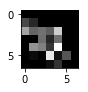

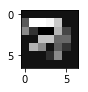

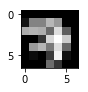

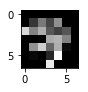

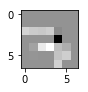

In [178]:
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')
    plt.show()

## 참고사이트

1. https://www.youtube.com/watch?v=E9Xh_fc9KnQ&index=38&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm
2. https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-11-0-cnn_basics.ipynb